In [47]:
# Import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [48]:
# Read anndata object
adata = sc.read_h5ad("/Users/titu/Downloads/73f1c834-894d-4169-9f74-aeffd89108b4.TonsilAtlasADATAtoCAP.h5ad")

In [49]:
# Read Azimuth annotation
azimuth_url = "https://raw.githubusercontent.com/satijalab/azimuth-references/master/human_tonsil_v2/data/celltype_annotations.csv"
azimuth_df = pd.read_csv(azimuth_url, header=0)

In [50]:
azimuth_df.rename(columns={azimuth_df.columns[0]: "barcode"}, inplace=True)
azimuth_df.set_index('barcode', inplace=True)

In [51]:
# Subset adata to keep only cells that have an azimuth annotation
adata = adata[azimuth_df.index, :]

In [52]:
# Add Azimuth annotation
adata.obs["cell_type_azimuth"] = azimuth_df.loc[adata.obs_names, "celltype.l1"]

/var/folders/m3/ym0cnc211_b0vjxwgv7m6pbm0000gn/T/ipykernel_24770/1811921808.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cell_type_azimuth"] = azimuth_df.loc[adata.obs_names, "celltype.l1"]


In [53]:
# Remove unwanted columns in metadata
unwanted_columns = ['cell_types_level1', 'cell_types_level2', 'cell_types_level3_20230508', 'cell_types_level1--cell_fullname',
       'cell_types_level1--cell_ontology_exists', 'cell_types_level1--cell_ontology_term_id',
       'cell_types_level1--cell_ontology_term', 'cell_types_level1--synonyms',
       'cell_types_level2--cell_fullname', 'cell_types_level2--cell_ontology_exists',
       'cell_types_level2--cell_ontology_term_id', 'cell_types_level2--cell_ontology_term', 'cell_types_level2--rationale',
       'cell_types_level2--marker_gene_evidence', 'cell_types_level2--canonical_marker_genes',
       'cell_types_level2--synonyms', 'cell_types_level2--category_fullname', 'cell_types_level2--category_cell_ontology_exists',
       'cell_types_level2--category_cell_ontology_term_id', 'cell_types_level2--category_cell_ontology_term',
       'cell_types_level1--rationale', 'cell_types_level1--marker_gene_evidence',
       'cell_types_level1--canonical_marker_genes', 'cell_types_level1--category_fullname',
       'cell_types_level1--category_cell_ontology_exists', 'cell_types_level1--category_cell_ontology_term_id',
       'cell_types_level1--category_cell_ontology_term', 'cell_types_level2--rationale_dois',
       'cell_types_level2--cell_ontology_assessment', 'cell_types_level3_20230508--cell_fullname',
       'cell_types_level3_20230508--cell_ontology_exists', 'cell_types_level3_20230508--cell_ontology_term_id',
       'cell_types_level3_20230508--cell_ontology_term', 'cell_types_level3_20230508--rationale_dois',
       'cell_types_level3_20230508--marker_gene_evidence', 'cell_types_level3_20230508--canonical_marker_genes',
       'cell_types_level3_20230508--synonyms', 'cell_types_level3_20230508--category_fullname',
       'cell_types_level3_20230508--category_cell_ontology_exists', 'cell_types_level3_20230508--category_cell_ontology_term_id',
       'cell_types_level3_20230508--category_cell_ontology_term',]
adata.obs.drop(unwanted_columns, axis=1, inplace=True)
adata

AnnData object with n_obs × n_vars = 377963 × 38606
    obs: 'barcode', 'donor_id', '10X_channel', 'libraryID', 'assay', 'sex', 'age', 'age_group', 'hospital', 'disease', 'organism', 'tissue', 'organism--cell_ontology_term_id', 'tissue--cell_ontology_term_id', 'assay--cell_ontology_term_id', 'disease--cell_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_azimuth'
    var: 'gene_names', 'ensembl_id', 'gene_symbol'
    uns: 'ArrayExpress', 'Azimuth', 'DOI', 'GitHub', 'HCATonsilData', 'X_layer_explanation', 'Zenodo', 'cellannotation_metadata', 'cellannotation_schema_version', 'description', 'title'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [57]:
# Rename PC/doublet
adata.obs["cell_type_azimuth"][adata.obs["cell_type_azimuth"] == "PC/doublet"] = "PC_unknown_doublet"

/var/folders/m3/ym0cnc211_b0vjxwgv7m6pbm0000gn/T/ipykernel_24770/2881175762.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs["cell_type_azimuth"][adata.obs["cell_type_azimuth"] == "PC/doublet"] = "PC_unknown_doublet"
/var/folder

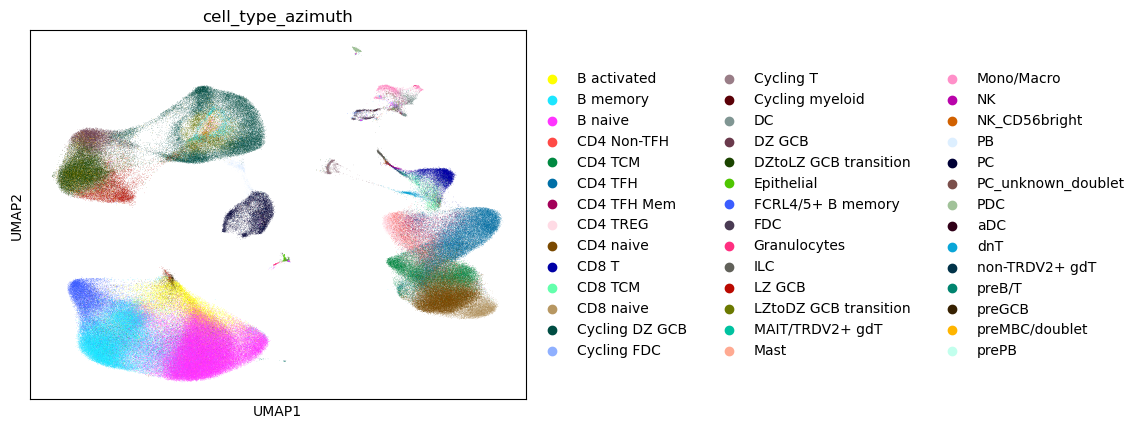

In [58]:
# Plot UMAP to verify that the cell_type_azimuth was properly transferred
sc.pl.umap(adata=adata, color="cell_type_azimuth")

In [59]:
# Remove unwanted slots in "uns"
del adata.uns["cellannotation_metadata"]['cell_types_level1']
del adata.uns["cellannotation_metadata"]['cell_types_level2']
del adata.uns["cellannotation_metadata"]['cell_types_level3_20230508']

In [61]:
# Save
sc.write(adata=adata, filename="/Users/titu/Downloads/TonsilAtlasADATAtoCAP_v2.h5ad")